<p style="text-align:center; font-weight:bolder; font-size: 2em">
    L5-Tutorial-Regression
</p>
<p style="text-align:center; font-family:courier; font-size: 110%">
    <br>18 Feb 2019
    <br>COM5508 Media Data Analytics
    <br>Department of Media and Communication
    <br>City University of Hong Kong
</p>

# Loading DataFrame from CSV

In [1]:
# import packages
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')

# Read data from file
df = pd.read_csv('./movie_metadata.csv')

# Handling missing values and duplicates
df = df.dropna()
df = df.drop_duplicates()

# Linear Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [2]:
feature_list = list(set(df._get_numeric_data().columns) - set(['imdb_score', 'title_year', 'aspect_ratio', 'facenumber_in_poster']))

print(feature_list)

['cast_total_facebook_likes', 'actor_2_facebook_likes', 'budget', 'num_voted_users', 'director_facebook_likes', 'actor_3_facebook_likes', 'num_user_for_reviews', 'movie_facebook_likes', 'gross', 'duration', 'num_critic_for_reviews', 'actor_1_facebook_likes']


In [3]:
# This is Ordinary Least Squares (scipy.linalg.lstsq) wrapped as a predictor object.
from sklearn.linear_model import LinearRegression

# independent variables
X = df[feature_list]

# transfer independent variables to log scale and add to data frame
for i in feature_list:
    df[i + '_log'] = np.log(df[i] + 1)
X_log = df[[i + '_log' for i in feature_list]]

# response variables
y = df['imdb_score']

# Fit model and evaluate by the coefficient of determination, i.e. R^2.
model = LinearRegression()

model.fit(X, y)
print('R2 using X: ', model.score(X, y))
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

model.fit(X_log, y)
print('R2 using X_log: ', model.score(X_log, y))
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

R2 using X:  0.32887108259099884
Intercept: 4.845552333100143
Coefficients: [-7.63585214e-05  7.81585036e-05 -5.44577938e-11  3.98389880e-06
  7.74644917e-06  7.34713977e-05 -5.55919146e-04 -2.73643258e-06
 -1.75853358e-09  1.18533101e-02  1.57563094e-03  7.67850557e-05]
R2 using X_log:  0.4385513874263962
Intercept: -2.058814852031446
Coefficients: [-0.36302546  0.06507785 -0.24040081  0.58846476  0.00935442 -0.0528724
 -0.27949682  0.00805371 -0.05883548  2.00980817  0.01539931  0.2676895 ]


In [4]:
# Standardize each column (x)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_log)
X_log_standardized = pd.DataFrame(scaler.transform(X_log), columns = X_log.columns)

scaler = StandardScaler()
scaler.fit(y.values.reshape(-1,1))
y_standardized = scaler.transform(y.values.reshape(-1,1))

model.fit(X_log_standardized, y_standardized)
print('R2 using X_log_standardized: ', model.score(X_log_standardized, y_standardized))
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

R2 using X_log_standardized:  0.4385513874263962
Intercept: [-2.76952719e-15]
Coefficients: [[-0.51353285  0.08883729 -0.33491089  0.79043315  0.02143574 -0.06783735
  -0.26582318  0.03380056 -0.11563201  0.34484576  0.01193498  0.434538  ]]


In [5]:
import statsmodels.api as sm

# fit linear regression model using statsmodel package
X2 = sm.add_constant(X_log_standardized)
model = sm.OLS(y_standardized, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     241.5
Date:                Wed, 20 Feb 2019   Prob (F-statistic):               0.00
Time:                        13:41:22   Log-Likelihood:                -4208.2
No. Observations:                3723   AIC:                             8442.
Df Residuals:                    3710   BIC:                             8523.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## Stochastic Gradient Descent

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor

In [6]:
from sklearn.linear_model import SGDRegressor

X = df[feature_list]
X_log = df[[i + '_log' for i in feature_list]]
y = df['imdb_score']

model = SGDRegressor()

# Fit model and evaluate by the coefficient of determination, i.e. R^2.

model.fit(X_log, y)
print('R2 using X_log: ', model.score(X_log, y))
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

R2 using X_log:  -2.2704635493410445e+17
Intercept: [1.42500295e+09]
Coefficients: [-2.38376503e+09  3.51905114e+08 -1.48294356e+07 -1.19683411e+08
 -2.83212533e+07  4.15752089e+08  1.17278950e+08  3.99392578e+06
  4.19111653e+07  4.57787481e+08 -7.27767157e+07  1.63054318e+09]


In [7]:
# According to Sklearn's tips on practical use:
# Stochastic Gradient Descent is sensitive to feature scaling, so it is highly recommended to scale your data.
# Reference: https://scikit-learn.org/stable/modules/sgd.html

model = SGDRegressor()
model.fit(X_log_standardized, y)
print('R2 using X_log_standardized: ', model.score(X_log_standardized, y))
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

R2 using X_log_standardized:  0.4319666889057172
Intercept: [6.46532866]
Coefficients: [-0.1108841   0.02534254 -0.36062186  0.77272202  0.02421966 -0.15823527
 -0.24386764  0.04613838 -0.14202326  0.35219389  0.01956782  0.1233783 ]


# Logit Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

R-square:  1.0
Intercept: [0.1397382]
Coefficients: [[3.92391757]]


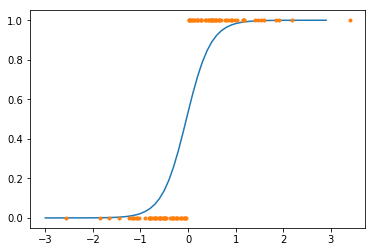

In [8]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# General a dataset
X = np.random.normal(size=100)
y = X > 0

# Fit model and evaluate by the coefficient of determination, i.e. R^2.
model = LogisticRegression()
X = X.reshape(-1, 1)
model.fit(X, y)
print('R-square: ', model.score(X, y))
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

# define a logit function
def logit_function(x):
    return 1 / (1 + np.exp(-x))

# plot the logit curve
X_curve = np.arange(-3, 3, 0.1)
plt.plot(X_curve, logit_function(X_curve * model.coef_[0] + model.intercept_), '-')

# Plot the original points
plt.plot(X, y, '.')
plt.show()

# LDA (Linear Discriminant Analysis)

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

country_list = ['USA', 'China']
subdf = df[df['country'].isin(country_list)]
X = subdf[['actor_1_facebook_likes', 'actor_2_facebook_likes']].values
y = subdf['country'].values

# Fit model and evaluate by the coefficient of determination, i.e. R^2.
model = LinearDiscriminantAnalysis()
model.fit(X, y)

print(model.score(X, y))
print(model.coef_)
print(model.intercept_)
print(model.explained_variance_ratio_)

0.9959636730575177
[[1.33377348e-05 2.61306917e-05]]
[5.38385889]
[1.]


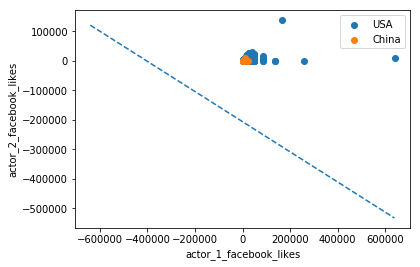

In [10]:
# plot the original points
for country in country_list:
    plt.scatter(X[y == country, 0], X[y == country, 1], label = country)

# plot the fitted line
x = np.arange(-max(X[:, 0]), max(X[:, 0]), 1000)
plt.plot(x, - model.coef_[0][0]/model.coef_[0][1] * x - model.intercept_/model.coef_[0][1], '--')

plt.xlabel('actor_1_facebook_likes')
plt.ylabel('actor_2_facebook_likes')
plt.legend()
plt.show()